# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I TeamBM4, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [54]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_train =pd.read_csv("C:/Users/terci/OneDrive/Documents/ExploreAI course material/Machine Learning/Advanced Regression/Advanced-Regression-Starter-Data-3036/Advanced-Regression-Starter-Data/df_train.csv") # load the data
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [4]:

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')


In [5]:
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [6]:
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])

In [7]:

df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])

"\nfeatures = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',\n            'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',\n            'Madrid_clouds_all', 'Seville_temp_max', 'Barcelona_wind_deg', 'Seville_pressure',\n            'Valencia_pressure', 'Madrid_pressure', 'Barcelona_pressure', 'Bilbao_pressure', 'Bilbao_wind_deg',\n            'Barcelona_wind_speed', 'Valencia_clouds_all', 'Valencia_humidity', 'Barcelona_humidity', 'Bilbao_humidity',\n            'Madrid_rain_1h', 'Barcelona_rain_1h', 'Bilbao_rain_3h', 'Seville_rain_1h', 'Madrid_wind_deg',\n            'Seville_wind_speed', 'Valencia_rain_1h', 'Valencia_rain_3h', 'Seville_rain_3h', 'Barcelona_rain_3h',\n            'Madrid_rain_3h', 'Barcelona_wind_deg']\nfig, axs = plt.subplots(6, 7, figsize=(20, 20))\nfor i, feature in enumerate(features):\n    sns.histplot(df[feature], ax=axs[i//7][i%7], kde=True)\n"

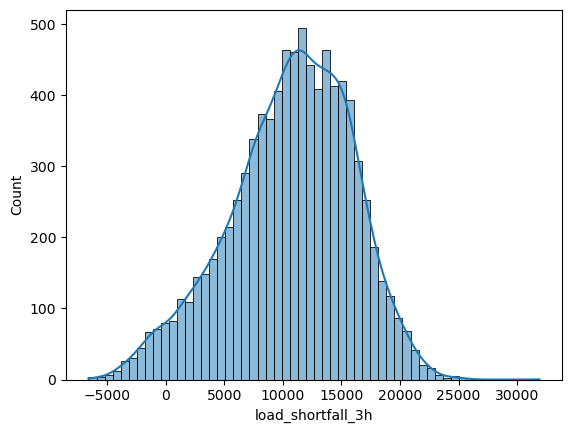

In [6]:
# plot relevant feature interactions
sns.histplot(df_train['load_shortfall_3h'], kde=True)
"""
features = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
            'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
            'Madrid_clouds_all', 'Seville_temp_max', 'Barcelona_wind_deg', 'Seville_pressure',
            'Valencia_pressure', 'Madrid_pressure', 'Barcelona_pressure', 'Bilbao_pressure', 'Bilbao_wind_deg',
            'Barcelona_wind_speed', 'Valencia_clouds_all', 'Valencia_humidity', 'Barcelona_humidity', 'Bilbao_humidity',
            'Madrid_rain_1h', 'Barcelona_rain_1h', 'Bilbao_rain_3h', 'Seville_rain_1h', 'Madrid_wind_deg',
            'Seville_wind_speed', 'Valencia_rain_1h', 'Valencia_rain_3h', 'Seville_rain_3h', 'Barcelona_rain_3h',
            'Madrid_rain_3h', 'Barcelona_wind_deg']
fig, axs = plt.subplots(6, 7, figsize=(20, 20))
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axs[i//7][i%7], kde=True)
"""


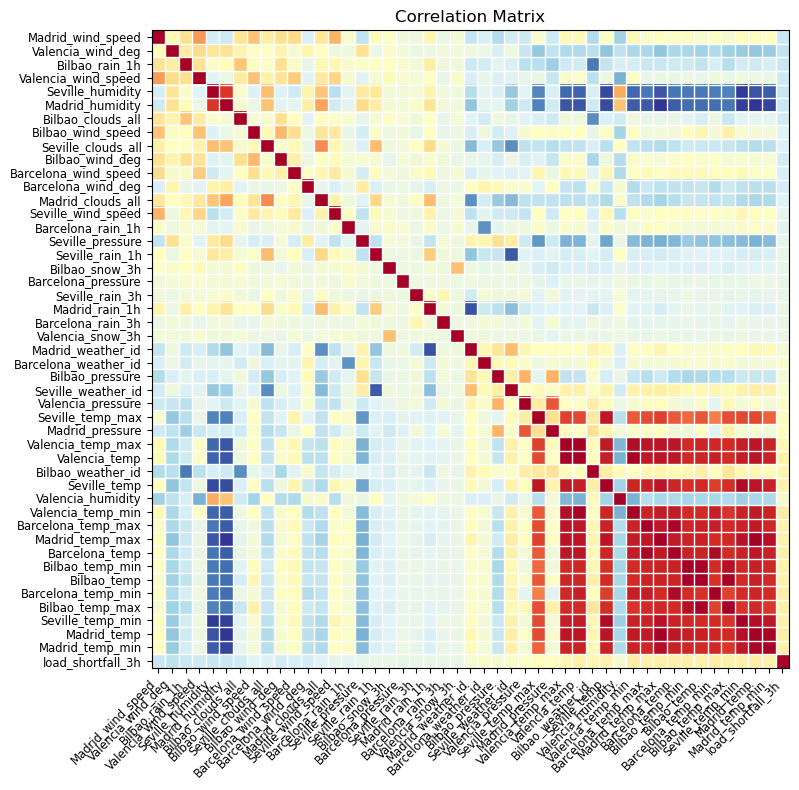

<Figure size 1000x800 with 0 Axes>

In [75]:
# evaluate correlation
fig = plt.figure(figsize=(10,8));
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax, )

In [10]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [10]:
# remove missing values/ features
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [11]:
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mean())
df_train.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [ ]:
df_train = df_train.drop(['Unnamed: 0', 'time'], axis=1)

In [14]:
# create new features

In [15]:
# engineer existing features
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [16]:
df_train['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg'])

In [17]:
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')
df_train['Seville_pressure'] = pd.to_numeric(df_train['Seville_pressure'])
df_train['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [20]:
# split data and create targets and features dataset
X = df_train.drop('load_shortfall_3h', axis=1)
y = df_train['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# create one or more ML models
#Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R-squared score:', r2)

RMSE: 4903.185957910749
R-squared score: 0.14635055835263755


In [26]:
#Ridge regression model

Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge_pred = Ridge.predict(X_test)
r2_ridge = r2_score(y_test, Ridge_pred)

print('RMSE:', np.sqrt(mean_squared_error(y_test,Ridge_pred)))
print('R-squared score:', r2_ridge)


RMSE: 4903.9362061052
R-squared score: 0.1460893004863847


In [25]:
#Lasso model

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
r2_lasso = r2_score(y_test, lasso_pred)

print('RMSE:', np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('R-squared score:', r2_lasso)

RMSE: 4904.181385305076
R-squared score: 0.14600391341488694


In [29]:
#Decission tree

Dec_tree = DecisionTreeRegressor(random_state=42)
Dec_tree.fit(X_train,y_train)

Tree_pred = Dec_tree.predict(X_test)
r2_tree = r2_score(y_test, Tree_pred)

print('RMSE:', np.sqrt(mean_squared_error(y_test,Tree_pred)))
print('R-squared score:', r2_tree)


RMSE: 6355.846775222968
R-squared score: -0.4343979936421958


In [32]:
#Random forest model

RF = RandomForestRegressor(n_estimators=200, max_depth=8)
RF.fit(X_train,y_train)

RF_predict = RF.predict(X_test)
r2_RF = r2_score(y_test, RF_predict)

print('RMSE:', np.sqrt(mean_squared_error(y_test,RF_predict)))
print('R-squared score:', r2_RF)

RMSE: 4653.1752124192935
R-squared score: 0.23118536249496902


In [61]:
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})
print(Rand_.head())

            Actual     Predicted
1226  11450.666667  11344.398997
7903  13693.333333  10489.998597
1559  18337.333333  12008.904199
3621  -1221.000000   7535.079142
7552   8515.000000  13703.711973


In [32]:
# evaluate one or more ML models

RMSE: 4882.39403224794
R-squared score: 0.144916168658061


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [20]:
# Compare model performance

In [21]:
# Choose best model and motivate why it is the best choice

In [33]:
df_test = pd.read_csv("C:/Users/terci/OneDrive/Documents/ExploreAI course material/Machine Learning/Advanced Regression/Advanced-Regression-Starter-Data-3036/Advanced-Regression-Starter-Data/df_test.csv")

In [35]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [37]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [38]:
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mean())

In [41]:
df_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [39]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg'])

In [40]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [68]:

Data = pd.DataFrame(RF_predict, columns=['load_shortfall_3h'])
Data.head()

,load_shortfall_3h
0,11344.398997
1,10489.998597
2,12008.904199
3,7535.079142
4,13703.711973


In [70]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(Data)
submission.to_csv('submission.csv', index=False)

In [74]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11344.398997
1,2018-01-01 03:00:00,10489.998597
2,2018-01-01 06:00:00,12008.904199
3,2018-01-01 09:00:00,7535.079142
4,2018-01-01 12:00:00,13703.711973
...,...,...
2915,2018-12-31 09:00:00,NaN
2916,2018-12-31 12:00:00,NaN
2917,2018-12-31 15:00:00,NaN
2918,2018-12-31 18:00:00,NaN


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [22]:
# discuss chosen methods logic